<b><font color = 'red'><style>
h1 {text-align: center;}</style><h1> Machine Learning Classification</h1> </font> </b>

<b><font color = 'red'> <h4>Churn Prediction </h4></font></b>

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Reading the customer data that we will be using

#data='https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'
#
#!wget $data -o data-week-3.csv  > /dev/null 2>&1

#####> /dev/null 2>&1 redirects all output from wget (both standard output and errors) to "null," effectively suppressing it. This prevents the download messages from appearing in the cell output.



In [3]:
# df1=pd.read_csv('data-week-3.csv')
# df1


In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<b><font color ='red'> Data Preparation </font></b>

In [5]:
df.columns=df.columns.str.lower().str.replace(' ','_')

df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
col_list_object=list(df.dtypes[(df.dtypes=='object')].index)
col_list_object

['customerid',
 'gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'totalcharges',
 'churn']

In [7]:
for item in col_list_object:
    df[item]=df[item].str.lower().str.replace(' ','_')
    
df

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.5,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-resvb,male,0,yes,yes,24,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,yes,mailed_check,84.80,1990.5,no
7039,2234-xaduh,female,0,yes,yes,72,yes,yes,fiber_optic,no,...,yes,no,yes,yes,one_year,yes,credit_card_(automatic),103.20,7362.9,no
7040,4801-jzazl,female,0,yes,yes,11,no,no_phone_service,dsl,yes,...,no,no,no,no,month-to-month,yes,electronic_check,29.60,346.45,no
7041,8361-ltmkd,male,1,yes,no,4,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,yes,mailed_check,74.40,306.6,yes


In [8]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [9]:
#totalcharges column should be numneric ie float or integer but it is object that means that some of the values in the column are string 
#Hence I will try to convert the column to numeric and the error will tell us if that is the case i.e if there are certain values that can no be converted to numeric

pd.to_numeric(df.totalcharges)

ValueError: Unable to parse string "_" at position 488

In [10]:
# that means that the dataset has missing values represented by space and since in our case we replaced the spaces by underscore hence this is this is the case.
# Hence while trying to convert to numeric for errors i will replace those values by NaN using the error parameter

df.totalcharges=pd.to_numeric(df.totalcharges,errors='coerce')

errors='coerce':

The errors parameter tells pd.to_numeric how to handle non-numeric values.
Setting errors='coerce' instructs pandas to replace any non-numeric values with NaN (Not a Number).
For example, if totalcharges has a value 'abc', pd.to_numeric will replace it with NaN instead of throwing an error.


'raise'	Raises an error if any value is non-numeric (default behavior).
'coerce'	Converts non-numeric values to NaN. Useful for handling invalid values without stopping code.
'ignore'	Leaves the values as they are without any conversion.


errors ::	Handles non-numeric values ('raise', 'coerce', or 'ignore').

downcast ::	Attempts to downcast numeric data types ('integer', 'float', 'unsigned').

dtype_backend	:: Specifies the backend for data types (e.g., 'numpy_nullable', 'pyarrow') for specialized data handling.

In [11]:
#Lets check whether the data now has NaN values
df.totalcharges.isnull().sum()

np.int64(11)

In [12]:
# there are 11 values that are null. lets take a look at the customer ids that have these null values
df[df.totalcharges.isnull()][['customerid','totalcharges']]

,customerid,totalcharges
488,4472-lvygi,NaN
753,3115-czmzd,NaN
936,5709-lvoeq,NaN
1082,4367-nuyao,NaN
1340,1371-dwpaz,NaN
3331,7644-omvmy,NaN
3826,3213-vvolg,NaN
4380,2520-sgtta,NaN
5218,2923-arzlg,NaN
6670,4075-wkniu,NaN


In [13]:
#Replace the NaN values by zero
df.totalcharges=df.totalcharges.fillna(0)

In [14]:
#Take a took at our target variable that is churn. ie whether the customer left or not
df.churn

0        no
1        no
2       yes
3        no
4       yes
       ... 
7038     no
7039     no
7040     no
7041    yes
7042     no
Name: churn, Length: 7043, dtype: object

In [15]:
# since this column has Yes and No hence lets change the column to numeric type. since then only we can utilise the column in machine learning
df.churn=(df.churn=='yes').astype(int)

<b><font color='red'> Setting up the validation framework </font></b>

In [16]:
# Now we will split the data in train validation and split.
# We will import the scikit learn library that we will use to train and test and split the data
from sklearn.model_selection import train_test_split

In [17]:
# we can use the ? to see the help/implementation of a function
train_test_split?



Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

In [18]:
#this will split the sample into the test an train data set  so we have to split the data again in the train and validation data set
df_train_full,df_test=train_test_split(df,test_size=0.2,random_state=1)

In [19]:
#Now we will again split the train data in train and validation also the the size of the test data in now 0.25 since 20% of 100 is 25% of 80
df_train,df_val=train_test_split(df_train_full,test_size=0.25,random_state=1)

len(df_train),len(df_val),len(df_test)

(4225, 1409, 1409)

In [20]:
df_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
3897,8015-ihcgw,female,0,yes,yes,72,yes,yes,fiber_optic,yes,...,yes,yes,yes,yes,two_year,yes,electronic_check,115.50,8425.15,0
1980,1960-uycnn,male,0,no,no,10,yes,yes,fiber_optic,no,...,yes,no,no,yes,month-to-month,yes,electronic_check,95.25,1021.55,0
6302,9250-wypll,female,0,no,no,5,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,no,electronic_check,75.55,413.65,1
727,6786-obwqr,female,0,yes,yes,5,yes,no,fiber_optic,no,...,no,no,yes,no,month-to-month,yes,electronic_check,80.85,356.10,0
5104,1328-euzhc,female,0,yes,no,18,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.10,370.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3774,1309-xgfsn,male,1,yes,yes,52,yes,yes,dsl,no,...,yes,no,yes,yes,one_year,yes,electronic_check,80.85,4079.55,0
6108,4819-hjpiw,male,0,no,no,18,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,no,mailed_check,25.15,476.80,0
1530,3703-vavcl,male,0,yes,yes,2,yes,no,fiber_optic,no,...,yes,yes,no,yes,month-to-month,no,credit_card_(automatic),90.00,190.05,1
3701,3812-lrzir,female,0,yes,yes,27,yes,yes,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,electronic_check,24.50,761.95,0


In [21]:
#Now I can reset the inexes of the dataframe, not that it makes any difference it is just that if the indexes are in increasing order then it makes easier to look for the rows.
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

df_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,8015-ihcgw,female,0,yes,yes,72,yes,yes,fiber_optic,yes,...,yes,yes,yes,yes,two_year,yes,electronic_check,115.50,8425.15,0
1,1960-uycnn,male,0,no,no,10,yes,yes,fiber_optic,no,...,yes,no,no,yes,month-to-month,yes,electronic_check,95.25,1021.55,0
2,9250-wypll,female,0,no,no,5,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,no,electronic_check,75.55,413.65,1
3,6786-obwqr,female,0,yes,yes,5,yes,no,fiber_optic,no,...,no,no,yes,no,month-to-month,yes,electronic_check,80.85,356.10,0
4,1328-euzhc,female,0,yes,no,18,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.10,370.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4220,1309-xgfsn,male,1,yes,yes,52,yes,yes,dsl,no,...,yes,no,yes,yes,one_year,yes,electronic_check,80.85,4079.55,0
4221,4819-hjpiw,male,0,no,no,18,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,no,mailed_check,25.15,476.80,0
4222,3703-vavcl,male,0,yes,yes,2,yes,no,fiber_optic,no,...,yes,yes,no,yes,month-to-month,no,credit_card_(automatic),90.00,190.05,1
4223,3812-lrzir,female,0,yes,yes,27,yes,yes,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,electronic_check,24.50,761.95,0


In [22]:
#Create the target variable arrays
y_train=df_train.churn.values
y_val=df_val.churn.values
y_test=df_test.churn.values

len(y_train),len(y_val),len(y_test)


(4225, 1409, 1409)

In [23]:
# delete the target variable from the train val and test dataframes

del df_train['churn']
del df_val['churn']
del df_test['churn']

df_train


,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,8015-ihcgw,female,0,yes,yes,72,yes,yes,fiber_optic,yes,yes,yes,yes,yes,yes,two_year,yes,electronic_check,115.50,8425.15
1,1960-uycnn,male,0,no,no,10,yes,yes,fiber_optic,no,yes,yes,no,no,yes,month-to-month,yes,electronic_check,95.25,1021.55
2,9250-wypll,female,0,no,no,5,yes,yes,fiber_optic,no,no,no,no,no,no,month-to-month,no,electronic_check,75.55,413.65
3,6786-obwqr,female,0,yes,yes,5,yes,no,fiber_optic,no,no,no,no,yes,no,month-to-month,yes,electronic_check,80.85,356.10
4,1328-euzhc,female,0,yes,no,18,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.10,370.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4220,1309-xgfsn,male,1,yes,yes,52,yes,yes,dsl,no,yes,yes,no,yes,yes,one_year,yes,electronic_check,80.85,4079.55
4221,4819-hjpiw,male,0,no,no,18,no,no_phone_service,dsl,no,no,no,no,no,no,month-to-month,no,mailed_check,25.15,476.80
4222,3703-vavcl,male,0,yes,yes,2,yes,no,fiber_optic,no,no,yes,yes,no,yes,month-to-month,no,credit_card_(automatic),90.00,190.05
4223,3812-lrzir,female,0,yes,yes,27,yes,yes,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,electronic_check,24.50,761.95


<b><font color = 'red'> EDA </font></b>

✨Check for missing values
✨Look at the target variable(churn)
✨Look at numerical and categorical variables

In [24]:
df_train_full.reset_index(drop='True',inplace=True)

In [25]:
df_train_full.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [26]:
df_train_full.churn.unique()

array([0, 1])

In [27]:
df_train_full.churn.nunique()

2

In [28]:
df_train_full.churn.value_counts()

churn
0    4113
1    1521
Name: count, dtype: int64

In [29]:
df_train_full.churn.value_counts(normalize=True) #Normalize parameter returns the relative frequencies of the unique values

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [30]:
#This above value that is 0.269968 is the global churn rate. to calculate it we can directly take the mean of the churn column as well since that is binary variable having values only 0 and 1
gloabl_churn_rate=df_train_full.churn.mean()
round(gloabl_churn_rate,2)

np.float64(0.27)

In [31]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [32]:
df_train_full.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [33]:
categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [34]:
df_train_full[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

<b><font color ='red'> Feature importance : Churn rate and risk ratio</font></b>

🎇Feature importance analysis (part of EDA) - identifying which features affect our target variable

✨Churn rate
✨Risk ratio
✨Mutual information - later

In [35]:
# now we will take a look at the churn rate for each categorical varible.Lets start with gender.

churn_rate_female=df_train_full[df_train_full.gender=='female'].churn.mean()
churn_rate_female

np.float64(0.27682403433476394)

In [36]:
churn_rate_male=df_train_full[df_train_full.gender=='male'].churn.mean()
churn_rate_male

np.float64(0.2632135306553911)

In [37]:
#Churn rate for parter

churn_rate_partner = df_train_full[df_train_full.partner=='yes'].churn.mean()
churn_rate_partner 

np.float64(0.20503330866025166)

In [38]:
gloabl_churn_rate-churn_rate_partner # the churn rate for people with partner is 6% less than than the gloable churn rate

np.float64(0.06493474245795922)

In [39]:
churn_rate_nopartner = df_train_full[df_train_full.partner=='no'].churn.mean()
churn_rate_nopartner 

np.float64(0.3298090040927694)

In [40]:
gloabl_churn_rate-churn_rate_nopartner # i.e it is more than the global churn rate.

# However for male or female the churn rate is approximately the same.

np.float64(-0.05984095297455855)

In [41]:
# Hence we can say that the partner variable is more important for predicting the churn compared to the gender variable.

#Similarly we can also calculate the risk ratio. Churn rate difference and risk ratio both tell the same thing but in different way. the difference tells us in absolutes while the other one tells us in relative.


In [42]:
risk_ratio_parter=churn_rate_partner/gloabl_churn_rate
risk_ratio_parter

np.float64(0.7594724924338315)

In [43]:
risk_ratio_noparter=churn_rate_nopartner/gloabl_churn_rate
risk_ratio_noparter

np.float64(1.2216593879412643)

In [44]:
#hence we cna say that group/people with no parter are more likely to curn by aproximately 22%
#while group/people with parter are less likely to churn approximately by 25% less

Hence this is how we can decide which variables are important

In [45]:
#but doing this for each categorical variable is lengthy since first we have to know the values of that variable and then we will calculate the churn hence to avoid that
#we can utilise the sql query something like this

# select gender,
# avg(churn) as churn_rate,
# avg(churn)-gloabl_churn_rate as churn_rate_difference,
# avg(churn)/gloabl_churn_rate as risk_ratio
# from data 
# group by gender


#for this pandas has a group by function

In [46]:
df_train_full.groupby?


Signature:
df_train_full.groupby(
    by=None,
    axis: 'Axis | lib.NoDefault' = <no_default>,
    level: 'IndexLabel | None' = None,
    as_index: 'bool' = True,
    sort: 'bool' = True,
    group_keys: 'bool' = True,
    observed: 'bool | lib.NoDefault' = <no_default>,
    dropna: 'bool' = True,
) -> 'DataFrameGroupBy'
Docstring:
Group DataFrame using a mapper or by a Series of columns.

A groupby operation involves some combination of splitting the
object, applying a function, and combining the results. This can be
used to group large amounts of data and compute operations on these
groups.

Parameters
----------
by : mapping, function, label, pd.Grouper or list of such
    Used to determine the groups for the groupby.
    If ``by`` is a function, it's called on each value of the object's
    index. If a dict or Series is passed, the Series or dict VALUES
    will be used to determine the groups (the Series' values are first
    aligned; see ``.align()`` method). If a list or ndarra

In [47]:
df_train_full.groupby('gender')
#this returns an dataframe group by over which we can do aggregation using agg
#This creates a GroupBy object, which is a special type of object in pandas that organizes the data by groups but does not immediately display the grouped data.

#The GroupBy object is an intermediary object, meaning it doesn’t directly show the data but allows for various aggregation or transformation operations to be performed on each group.

In [48]:
#The output of this code is a pandas GroupBy object.
#The GroupBy object is an intermediary object, meaning it doesn’t directly show the data but allows for various aggregation or transformation operations to be performed on each group.
# 
# 
# 
# 
# What You Can Do with a GroupBy Object
# You can perform a range of operations on this GroupBy object, typically used to summarize or analyze the data within each group. Here are a few common ones:

# Aggregate Operations (agg, mean, sum, etc.):

# agg: Allows you to apply multiple aggregation functions to different columns.
# python
# Copy code
# df_train_full.groupby('gender').agg({'tenure': 'mean', 'monthlycharges': 'sum'})
# This would return a DataFrame showing the mean of tenure and the sum of monthlycharges for each gender.
# Other single operations: You can use mean, sum, count, etc., directly to get specific summaries.
# python
# Copy code
# df_train_full.groupby('gender').mean()
# This would return the mean of all numeric columns for each gender group.
# Transformations (transform, apply):

# transform: Allows you to perform operations that return results of the same shape as the original data.
# python
# Copy code
# df_train_full['gender_avg_tenure'] = df_train_full.groupby('gender')['tenure'].transform('mean')
# This would add a new column gender_avg_tenure with the mean tenure for each gender value.
# apply: Can be used to apply custom functions to each group.
# python
# Copy code
# df_train_full.groupby('gender').apply(lambda x: x.sort_values('tenure', ascending=False))
# This would sort each gender group by tenure in descending order.
# Filtering and Selection:

# You can also filter groups based on specific conditions.
# python
# Copy code
# df_train_full.groupby('gender').filter(lambda x: x['tenure'].mean() > 20)
# This would return only the groups where the average tenure is greater than 20.
# Accessing Group Data:

# You can access each group individually by looping through the GroupBy object.
# python
# Copy code
# for gender, group in df_train_full.groupby('gender'):
#     print(gender)
#     print(group.head())
# This would print the first few rows of each gender group separately.
# Example Output
# If you run an aggregation function like .mean() on this GroupBy object, it could return a DataFrame that looks something like this (assuming columns like tenure, monthlycharges exist):

# gender	tenure	monthlycharges
# Female	30.5	55.4
# Male	28.3	60.2
# In summary, groupby is powerful for dividing data into groups and performing computations within each group.

In [49]:
df_train_full.groupby('gender').churn
# it stills return the group by data frame object that has grouped values only for churn column

In [50]:
df_train_full.groupby('gender').churn.mean()
# this is a series type object but we need a dataframe because we want to add the difference and the risk ratio column as well. hence we can use the agg method that can be applied on the groupby dataframes.

gender
female    0.276824
male      0.263214
Name: churn, dtype: float64

In [51]:
df_train_full.groupby('gender').churn.agg(['mean','count']) # performs a list of aggrigatoin on the churn column

,mean,count
gender,,
female,0.276824,2796
male,0.263214,2838


In [52]:
#Lets add the two columns
df_group=df_train_full.groupby('gender').churn.agg(['mean','count'])

df_group['diff']=df_group['mean']-gloabl_churn_rate
df_group['risk_ratio']=df_group['mean']/gloabl_churn_rate

df_group

,mean,count,diff,risk_ratio
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


In [53]:
# Now we can repeat this for all the variables that we have in the list that has categorical variables

for item in categorical:
    df_group=df_train_full.groupby(item).churn.agg(['mean','count'])
    df_group['diff']=df_group['mean']-gloabl_churn_rate
    df_group['risk_ratio']=df_group['mean']/gloabl_churn_rate
    df_group

In [54]:
# usually jupyter notebooks display the last line of the cell code but since this is in the loop so it does not display.
#Hence we will import a function from Ipython. earlier the jupyter notebooks used to be ipython libraries.

In [55]:
from IPython.display import display

In [56]:
for item in categorical:
    print(item)
    df_group=df_train_full.groupby(item).churn.agg(['mean','count'])
    df_group['diff']=df_group['mean']-gloabl_churn_rate
    df_group['risk_ratio']=df_group['mean']/gloabl_churn_rate
    display(df_group)
    print()
    print()# for line break

gender


,mean,count,diff,risk_ratio
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk_ratio
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk_ratio
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk_ratio
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk_ratio
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk_ratio
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk_ratio
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk_ratio
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk_ratio
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk_ratio
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk_ratio
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk_ratio
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk_ratio
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk_ratio
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk_ratio
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk_ratio
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


###### Now we can say that which varibale could be important for predictin the churn. for example seems like contractr is good since the  churn rate is 59% more than the global average
###### but how can we say that one feature is more important in predicting the churn than other.
###### It would be good if there can be an over all number for a variable

##### we will see how to get that next

<b><font color='red'><h5>Feature Importance: Mutual Information</h5></font></b>
###### concept from information theory, it tells us how much we can learn about one variable if we know the value of another
###### https://en.wikipedia.org/wiki/Mutual_information

In [57]:
# to calculate the mutural score we have to import the library

from sklearn.metrics import mutual_info_score


In [58]:
# now lets calcualte the mutual informatoin score of churn with contract so that we know how important that variable is in terms to know the value of the churn if know this varibales value

mutual_info_score(df_train_full.churn,df_train_full.contract)



np.float64(0.0983203874041556)

In [59]:
#similarly lets calculate it for gender

mutual_info_score(df_train_full.churn,df_train_full.gender)

np.float64(0.0001174846211139946)

###### hence we can see that by knowing gender we can predict very less about the churn

In [60]:
#Now lets calculate the the mutual score of each categorical variable with the churn variable

# for that we have to use the apply method in apply method. using this we can apply a function to columns but the function can take only one variable.

# https://chatgpt.com/share/e/672da0ca-1d00-8003-acc2-22783febe711


# lets first define a function

def cal_mutual_score(series):
    return mutual_info_score(series,df_train_full.churn)

In [61]:
df_train_full[categorical].apply(cal_mutual_score)

gender              0.000117
seniorcitizen       0.009410
partner             0.009968
dependents          0.012346
phoneservice        0.000229
multiplelines       0.000857
internetservice     0.055868
onlinesecurity      0.063085
onlinebackup        0.046923
deviceprotection    0.043453
techsupport         0.061032
streamingtv         0.031853
streamingmovies     0.031581
contract            0.098320
paperlessbilling    0.017589
paymentmethod       0.043210
dtype: float64

In [62]:
mi=df_train_full[categorical].apply(cal_mutual_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

In [63]:
# Hence we are more interested in the variables that are at the top and hence these are the signals that the machine learning model pick to train the model and then later on predict the churn when the value is not known

Now we will learn about measuring the importance of the numerical variables


<b><font color ='red'><h4> Featrure importance : Correlation</h4></font></b>


Correlation coefficient - https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

In [64]:
# if the value of the correlation coefficient is between 0-0.2 or 0-(-0.2) then the correlation is weak/low ie. they are not that much correlated i.e rarely
# if the value of the correlation coefficient is between 0.2-0.5 or (-0.2)-(-0.5) then the correlation is moderate i.e sometimes
# if the value of the correlation coefficient is between 0.6-1 or (-0.6)-(-1.0) then the correlation is moderate i.e strong often/always

In [65]:
df_train_full[numerical].corrwith(df_train_full.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [66]:
# by looking at the numbers above we can say that the churn rate has a negative correlation with the tenure, higher the tenure less likely it is for the customer to leave due to this only the the total charges are more i.e the customer has stayed for more time hence it has a negative correlation which on a stand alone view seems like counter intuitive that if the charges are more then why the churn rate has a negative correalation
#We can also check that if the tenure is less that or equal to 2 months then the churn rate is high, while if the tenure is more than 12 months then the churn rate is less. same you can find about the monthly charges
df_train_full[df_train_full .tenure<=2].churn.mean()

np.float64(0.5953420669577875)

In [67]:
df_train_full[(df_train_full .tenure>2)&(df_train_full .tenure<=12)].churn.mean()

np.float64(0.3994413407821229)

In [68]:
df_train_full[df_train_full .tenure>12].churn.mean()

np.float64(0.17634908339788277)

In [69]:
# if want to take a look at the importance and not on the direction then we can just look at the absolute value
df_train_full[numerical].corrwith(df_train_full.churn).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

Next we will take a look at how we can encode categorical variables

<b><font color ='red'><h4> encoding categorical varibles : One - hot encoding</h4></font></b>

use scikit learn to encode categorical features

The reason that this is called as one hot encoding is because the 1 is kept hot and 0 as cold. The term comes from electronics, since when the current flows through a conductor it becomes hot and represents 1, hence one hot encoding

In [70]:
#We did OHE earlier manually using all the unique values of a column and then making new columns that had the values 0 1 in the columns.now lets use scikit learn


from sklearn.feature_extraction import DictVectorizer 

# dictvectorizer takes in the dictionary and vectorizes 

In [71]:
#Lets take a look at the df_train dataset and only the two columns and then we can use that to converto to dictionary
df_train[['gender','contract']].iloc[:20]

,gender,contract
0,female,two_year
1,male,month-to-month
2,female,month-to-month
3,female,month-to-month
4,female,two_year
5,male,month-to-month
6,male,month-to-month
7,female,month-to-month
8,female,two_year
9,female,month-to-month


In [72]:
#to_dict() converts the data into dictionary but column wise so columns become dictionary but we want to the dictioanry row wise 
df_train[['gender','contract']].iloc[:20].to_dict()

{'gender': {0: 'female',
  1: 'male',
  2: 'female',
  3: 'female',
  4: 'female',
  5: 'male',
  6: 'male',
  7: 'female',
  8: 'female',
  9: 'female',
  10: 'female',
  11: 'male',
  12: 'female',
  13: 'female',
  14: 'female',
  15: 'male',
  16: 'female',
  17: 'female',
  18: 'male',
  19: 'male'},
 'contract': {0: 'two_year',
  1: 'month-to-month',
  2: 'month-to-month',
  3: 'month-to-month',
  4: 'two_year',
  5: 'month-to-month',
  6: 'month-to-month',
  7: 'month-to-month',
  8: 'two_year',
  9: 'month-to-month',
  10: 'two_year',
  11: 'month-to-month',
  12: 'two_year',
  13: 'month-to-month',
  14: 'month-to-month',
  15: 'month-to-month',
  16: 'two_year',
  17: 'month-to-month',
  18: 'one_year',
  19: 'two_year'}}

In [73]:
# hence we will use the orient parameter of the to_dict method
df_train[['gender','contract']].iloc[:20].to_dict(orient='records')

[{'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'one_year'},
 {'gender': 'male', 'contract': 'two_year'}]

In [74]:
df_dict=df_train[['gender','contract']].iloc[:20].to_dict(orient='records')

In [75]:
vect=DictVectorizer() #instanciation of the class

In [76]:
DictVectorizer?


Init signature:
DictVectorizer(
    *,
    dtype=<class 'numpy.float64'>,
    separator='=',
    sparse=True,
    sort=True,
)
Docstring:     
Transforms lists of feature-value mappings to vectors.

This transformer turns lists of mappings (dict-like objects) of feature
names to feature values into Numpy arrays or scipy.sparse matrices for use
with scikit-learn estimators.

When feature values are strings, this transformer will do a binary one-hot
(aka one-of-K) coding: one boolean-valued feature is constructed for each
of the possible string values that the feature can take on. For instance,
a feature "f" that can take on the values "ham" and "spam" will become two
features in the output, one signifying "f=ham", the other "f=spam".

If a feature value is a sequence or set of strings, this transformer
will iterate over the values and will count the occurrences of each string
value.

However, note that this transformer will only do a binary one-hot encoding
when feature values are of ty

In [77]:
#Now we train our dict vectorizer and by training we show it this is how our data looks like.

vect.fit(df_dict)

DictVectorizer()

In [78]:
#Now lets transform our dictionary once the vectorizer has know about our data

vect.transform(df_dict)

#this produces a sparx matrix that is a matrix with very few non zero elements or a lot of zero elements. it comes from scipy
# but lets convert the data to normal numpy array and for that we will set sparx=false while instansciating the class


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 40 stored elements and shape (20, 5)>

In [79]:
vect=DictVectorizer(sparse=False)

In [80]:
vect.fit(df_dict)

DictVectorizer(sparse=False)

In [81]:
vect.transform(df_dict)

array([[0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1.]])

In [82]:
# By looking at the data we can say that it created 5 colums two for gender and 3 for contract

## we can take a look at the feature names to get what are the feature names as in which column is which 


vect.get_feature_names_out()

# this tells us the names of the columnsb

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'gender=female', 'gender=male'], dtype=object)

In [83]:
# now one of the most important features of the dict vectorizer is that it is smart. as in if we give it numerical varibale as well then it returns it as it is
# lets take a look by an example

df_dect=df_train_full[['gender','contract','tenure']].iloc[:20].to_dict(orient='records')

vect=DictVectorizer(sparse=False)

vect.fit(df_dect)

print(vect.get_feature_names_out())

vect.transform(df_dect)

# as you can see fron the feature names array that it has left the tenure column as is so using this we can directly prepare our final train dataset

['contract=month-to-month' 'contract=one_year' 'contract=two_year'
 'gender=female' 'gender=male' 'tenure']


array([[ 0.,  0.,  1.,  0.,  1., 12.],
       [ 0.,  1.,  0.,  1.,  0., 42.],
       [ 0.,  0.,  1.,  0.,  1., 71.],
       [ 0.,  1.,  0.,  0.,  1., 71.],
       [ 0.,  1.,  0.,  0.,  1., 30.],
       [ 1.,  0.,  0.,  1.,  0.,  9.],
       [ 0.,  0.,  1.,  0.,  1., 72.],
       [ 1.,  0.,  0.,  0.,  1., 28.],
       [ 1.,  0.,  0.,  0.,  1.,  6.],
       [ 1.,  0.,  0.,  1.,  0., 47.],
       [ 0.,  0.,  1.,  0.,  1., 22.],
       [ 1.,  0.,  0.,  1.,  0.,  2.],
       [ 1.,  0.,  0.,  0.,  1.,  3.],
       [ 1.,  0.,  0.,  1.,  0.,  4.],
       [ 0.,  1.,  0.,  0.,  1., 60.],
       [ 0.,  0.,  1.,  0.,  1., 72.],
       [ 0.,  0.,  1.,  0.,  1., 71.],
       [ 0.,  0.,  1.,  0.,  1., 69.],
       [ 0.,  1.,  0.,  0.,  1., 26.],
       [ 1.,  0.,  0.,  1.,  0., 33.]])

In [84]:
# now lets create out complete train dataset

train_dict=df_train_full[categorical+numerical].to_dict(orient='records')

In [85]:
train_dict[0]

# as we can see below that it has all the values from gender to total charges.

{'gender': 'male',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'no',
 'onlinesecurity': 'no_internet_service',
 'onlinebackup': 'no_internet_service',
 'deviceprotection': 'no_internet_service',
 'techsupport': 'no_internet_service',
 'streamingtv': 'no_internet_service',
 'streamingmovies': 'no_internet_service',
 'contract': 'two_year',
 'paperlessbilling': 'no',
 'paymentmethod': 'mailed_check',
 'tenure': 12,
 'monthlycharges': 19.7,
 'totalcharges': 258.35}

In [86]:
vect.fit(train_dict)

DictVectorizer(sparse=False)

In [87]:
vect.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [88]:
vect.transform(train_dict)


array([[0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        1.20000e+01, 2.58350e+02],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        4.20000e+01, 3.16055e+03],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        7.10000e+01, 4.68175e+03],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.80000e+01, 2.97950e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.00000e+00, 1.14100e+02],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        1.60000e+01, 1.11485e+03]])

In [89]:
# we can also do fit and transform in a single step, henct a shorter way of writing the same code

vect.fit_transform(train_dict)

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        1.20000e+01, 2.58350e+02],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        4.20000e+01, 3.16055e+03],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        7.10000e+01, 4.68175e+03],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.80000e+01, 2.97950e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.00000e+00, 1.14100e+02],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        1.60000e+01, 1.11485e+03]])

In [90]:
#Lets create our train and validation data set

val_dict=df_val[categorical+numerical].to_dict(orient='records')
X_train=vect.fit_transform(train_dict)
X_valid=vect.transform(val_dict) # we will now use the fit transform here the reason being that we want the same number of colums as generted by the fit transform based on the unique values of the columns

<b><font color ='red'><h4> Logistic Regression</h4></font></b>

This is used for classification. Classification can be of either multiclass classificaiton or binary classificaiton in our case we are looking at the binary classification
for binary classificaion we use logistic regression. and the target variable can have 1 and 0 only 1 is positive example like churn happned.

In linear regression the output is a number belonging to the real number but in loisctic regression the algorithm remains the same it is just that we apply a sigmoid functoin that pulls the values in the range 0 and 1 that is the probbality and can be utilised for the classification.

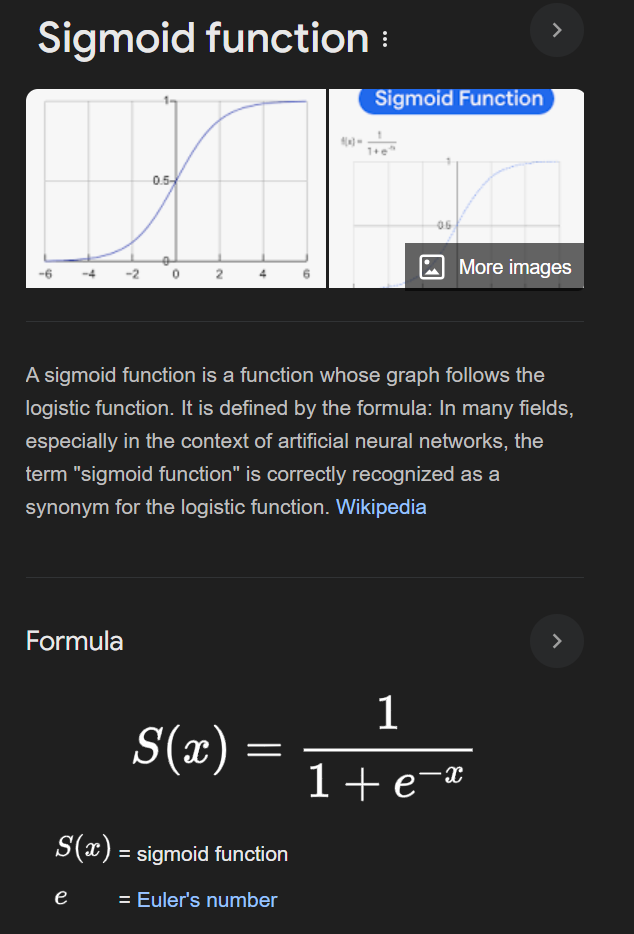

In [ ]:
#Lets implement sigmoid

def sigmoid(z):
    return 1/(1+np.exp(-z))

In [92]:
np.linspace?


Signature:      
np.linspace(
    start,
    stop,
    num=50,
    endpoint=True,
    retstep=False,
    dtype=None,
    axis=0,
    *,
    device=None,
)
Call signature:  np.linspace(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function linspace at 0x7e3a30780680>
File:            ~/.local/lib/python3.12/site-packages/numpy/_core/function_base.py
Docstring:      
Return evenly spaced numbers over a specified interval.

Returns `num` evenly spaced samples, calculated over the
interval [`start`, `stop`].

The endpoint of the interval can optionally be excluded.

.. versionchanged:: 1.16.0
    Non-scalar `start` and `stop` are now supported.

.. versionchanged:: 1.20.0
    Values are rounded towards ``-inf`` instead of ``0`` when an
    integer ``dtype`` is specified. The old behavior can
    still be obtained with ``np.linspace(start, stop, num).astype(int)``

Parameters
----------
start : array_like
    The starting value of the sequence.
stop : array_li